In [33]:
import numpy as np
import pickle
import matplotlib.pylab as plt
from numpy.linalg import slogdet, inv, solve
import preproc
%matplotlib inline

In [198]:
with open('testcube.pickle', 'rb') as fin:
    cube = pickle.load(fin)
    f = cube['f']
    y = cube['y']

(5, 250)


In [179]:
# random
#X = np.random.rand(1, 250)

In [206]:
# dataset 1
#import csv
#X = None
#with open('HPW_2012_41046.csv', 'r') as f:
#    csf = csv.DictReader(f)
#    for row in csf:
#        x = np.array([float(row['Hs']), float(row['W'])])
#        if np.sum(np.isnan(x))>0:
#            continue
#        if not X is None:
#            X = np.vstack( [X, x] )
#        else:
#            X = x
#X = X.T

In [200]:
def get_mi(X, m, eps = 1e-7):
    dim = X.shape[0]
    #Xj = preproc.td(X, m)
    shift = np.arange(-m, X.shape[1]-m, 1)
    shift[shift<0] = 0
    Xj = np.vstack([X, X[:, shift]])
    
    Xj = Xj[:,m:]
    dim_j = Xj.shape[0]
    
    cov_j = np.cov(Xj) + eps*np.eye(dim_j)
    
    cov_indep = np.copy(cov_j)
    
    cov_indep[:dim,dim:]=0
    cov_indep[dim:,:dim]=0
    
    _, logdet_indep = slogdet(cov_indep)
    _, logdet_j = slogdet(cov_j)
    mi = 0.5*( np.trace(np.dot(inv(cov_indep), cov_j)) - dim_j + logdet_indep - logdet_j)
    return mi

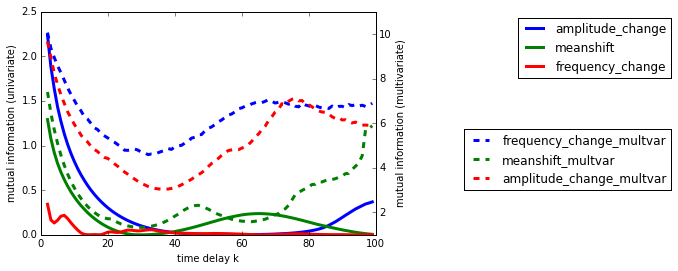

In [240]:
fig = plt.figure()
ax1 = plt.gca()
ax2 = ax1.twinx()
for dtype in f:
    X = f[dtype][0]
    k_values = range(2, 100)
    mi_s = [get_mi(X, k) for k in k_values]
    if X.shape[0]==1:
        ax1.plot(k_values, mi_s, linewidth=3)
    if X.shape[0]>1:
        ax2.plot(k_values, mi_s,  '--', linewidth=3)
ax1.legend([ n for n in f.keys() if not 'multvar' in n ], bbox_to_anchor=(1.9, 1.0))
ax2.legend([ n for n in f.keys() if 'multvar' in n ], bbox_to_anchor=(1.9, 0.5))
ax1.set_xlabel('time delay k')
ax1.set_ylabel('mutual information (univariate)')
ax2.set_ylabel('mutual information (multivariate)')

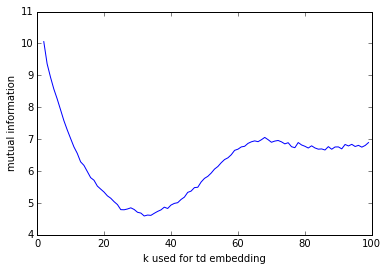

In [42]:
print mi

29.7018001534


In [116]:
def acf(x, length=20):
    corrs = [numpy.corrcoef(x[:-i], x[i:]) for i in range(1, length)]
    return np.array(corrs)

In [118]:
xuni = np.ravel(X[0,:])
a = acf(xuni)

In [119]:
print a.shape

(19, 2, 2)
